In [56]:
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',leaf_size=30,
                                             p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [59]:
image_data = np.load('/content/drive/MyDrive/ASSIGNMENT-3/data.npy')
label_data = np.load('/content/drive/MyDrive/ASSIGNMENT-3/labels.npy')
print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

Image data shape: (100, 299, 299)
Label data shape: (100,)


In [60]:
image_data = image_data.reshape(-1, 299 * 299)
image_df = pd.DataFrame(image_data, columns=[f'feature_{i}' for i in range(image_data.shape[1])])
label_df = pd.DataFrame(label_data, columns=['Label'])
merged_data = pd.concat([image_df, label_df], axis=1)
print(merged_data)

    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       135.0      133.0      131.0      129.0      129.0      129.0   
1       185.0       40.0        0.0        0.0        0.0        0.0   
2        24.0       24.0       24.0       24.0       23.0       23.0   
3        76.0       77.0       76.0       76.0       77.0       76.0   
4         1.0        0.0        0.0        0.0        0.0        0.0   
..        ...        ...        ...        ...        ...        ...   
95      255.0      255.0      255.0      255.0      255.0      255.0   
96       17.0       11.0        7.0        5.0        4.0        4.0   
97        0.0        0.0        0.0        0.0        0.0        0.0   
98        1.0        0.0        0.0        0.0        0.0        0.0   
99       25.0        8.0        2.0        0.0        0.0        0.0   

    feature_6  feature_7  feature_8  feature_9  ...  feature_89392  \
0       129.0      128.0      128.0      128.0  ...          172.

In [61]:
print(merged_data['Label'])

0     Infected
1     Infected
2     Infected
3     Infected
4     Infected
        ...   
95      Normal
96      Normal
97      Normal
98      Normal
99      Normal
Name: Label, Length: 100, dtype: object


In [62]:
X = merged_data.drop('Label', axis=1)
y = merged_data['Label']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


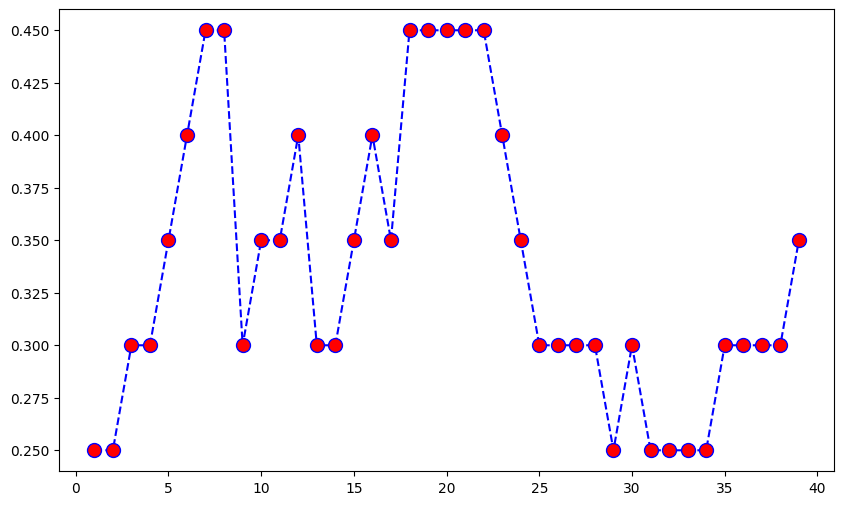

In [44]:
error_rate= []

for i in range(1,40):
  model1= KNeighborsClassifier(n_neighbors=i)
  model1.fit(X_train, y_train)
  y_pred=model1.predict(X_test)
  err_rate=np.mean(y_pred != y_test)
  error_rate.append(err_rate)

plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         error_rate,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10
         )

In [45]:
print("Minimum error", min(error_rate), "at k=", error_rate.index(min(error_rate)))

Minimum error 0.25 at k= 0


In [69]:
error_rate= []
model1= KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
err_rate=np.mean(y_pred != y_test)
error_rate.append(err_rate)
print(error_rate)

[0.25]


In [71]:

model2= KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree')
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
err_rate=np.mean(y_pred != y_test)
error_rate.append(err_rate)
print(error_rate)

[0.25, 0.25]


In [72]:

model3= KNeighborsClassifier(n_neighbors=1,algorithm='brute')
model3.fit(X_train, y_train)
y_pred=model3.predict(X_test)
err_rate=np.mean(y_pred != y_test)
error_rate.append(err_rate)
print(error_rate)

[0.25, 0.25, 0.25]


In [76]:
error_rate= []
model1= KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',leaf_size=30,
                        p=2,metric='minkowski',metric_params=None,n_jobs=None)
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
err_rate=np.mean(y_pred != y_test)
error_rate.append(err_rate)

model2= KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',leaf_size=30,
                        p=1,metric='minkowski',metric_params=None,n_jobs=None)
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
err_rate=np.mean(y_pred != y_test)
error_rate.append(err_rate)

model3= KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',leaf_size=30,
                        metric='cosine',metric_params=None,n_jobs=None)
model3.fit(X_train, y_train)
y_pred=model3.predict(X_test)
err_rate=np.mean(y_pred != y_test)
error_rate.append(err_rate)
print(error_rate)

[0.25, 0.4, 0.25]


Discussions:- Here, KNN algorithm is applied to the given dataset of covid-19. So, the optimal value of k which we get here is 1 for the auto algorithm.For this k=1, we get the accuracy of 75% which is highest possible. After that, we used the ball-tree, kd-tree and brute algorithm for the k=1. But the error rate are the same for all of these algorithm. After that we used different kinds of distance metrics But the error rate was high in the case of manhattan distance whether it is low as well as same for the both case of Euclidean and cosine distance metric.



strength of KNN:- It is very easy to implement and very simple.

weakness:- The accuracy is not so good. Also, choosing the best distance measure is an important problem.

                 THE END
